Data 620 Final Project JP 07162019 Final Version Data Visualization Part

In [1]:
import pandas as pd
import json
import numpy as np
from twython import Twython
import time
import os
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import re
from IPython.display import clear_output
import timeit
from PIL import Image
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

Now that we have collected tweets of 1st layers of the around 5K followers of senator. Which we dumped into a file named corpus.txt The file only contains tweets extracted from Tweets folder which we downloaded.

In [2]:
tweets = [line.rstrip('\n') for line in open('corpus.txt')]
tweets = list(set(tweets))
print("Done making array of tweets!")

Done making array of tweets!


Lets extract all the hashtags of the users and than draw a word cloud so we can filter out the hashtag related to politics and senator.

In [3]:
usa_mask = np.array(Image.open("usa.jpg"))

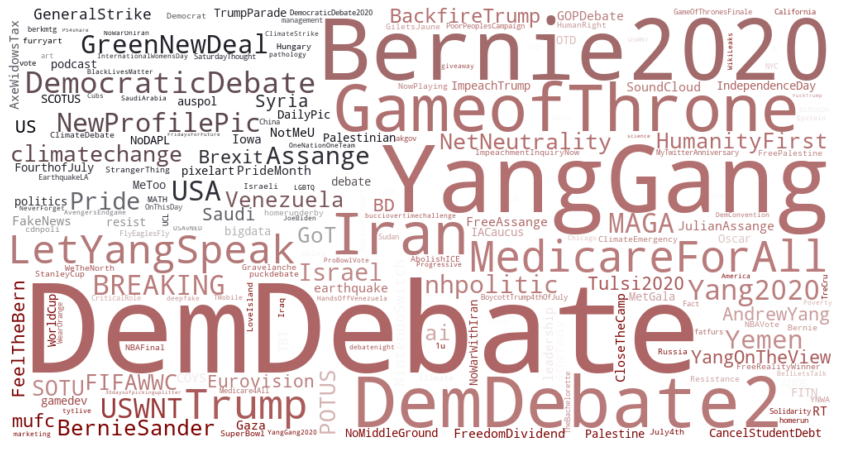

In [4]:
hashtag_corpus = ""
for tweet in tweets:
    hashtags = re.findall(r"(#\w+)", tweet)
    hashtag_corpus = hashtag_corpus +" ".join(hashtags)

hashtag_wordcloud = WordCloud(collocations = False,background_color="white", height=2000, width=4000, mode="RGB",mask=usa_mask)
image_colors = ImageColorGenerator(usa_mask)
freq = hashtag_wordcloud.process_text(hashtag_corpus)
hashtag_wordcloud.generate_from_frequencies(freq)
# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(hashtag_wordcloud.recolor(color_func=image_colors),interpolation='bilinear')
plt.axis('off');

Lets Plot top 50 Hash Tags frequency plot

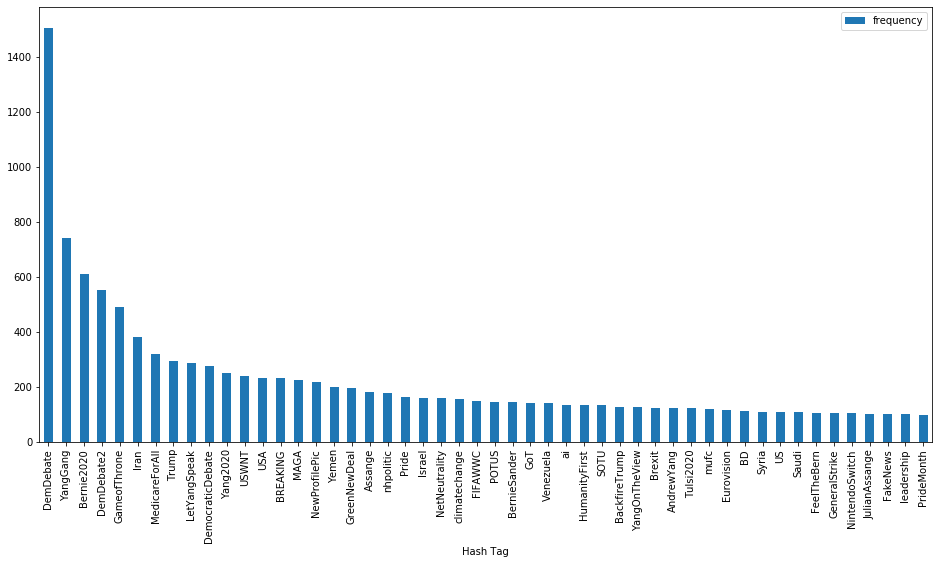

In [5]:
#for key in sorted(freq.values(),reverse=True)[:100]:
#    print(key)
freq_list = sorted(freq.items(), key=lambda x: x[1], reverse=True)[:50]
df = pd.DataFrame(freq_list, columns=['Hash Tag', 'frequency'])
df.plot(kind='bar',x='Hash Tag',y='frequency', figsize = (16,8))

Now that we have information about the major hashtags so lets construct a list of these words to find all the tweets related to politics

In [6]:
seed_words = ['DemDebate', 'YangGang', 'Bernie2020','DemDebate2','Iran','MedicareForAll','Trump','LetYangSpeak','DemocraticDebate','Yang2020','MAGA','Yemen','CancelStudentDebt','nhpolitic','Israel','TrumpParade','Venezuela','BernieSander','POTUS','AndrewYang','Syria','YangOnTheView','FeelTheBern','BackfireTrump','Saudi','Iraq']
#Lets do some pre-processing on the tweets dataset
cleaned_tweets = []
for tweet in tweets:
    tweet = re.sub(r"http\S+", "", tweet) # remove links from tweet
    tweet = re.sub(r"RT", "", tweet) # remove links from tweet
    cleaned_tweets.append(tweet)
#Lets get all the tweets which have these hashtags
seed_tweets = []
for tweet in cleaned_tweets:
    if re.compile('|'.join(seed_words),re.IGNORECASE).search(tweet):
        seed_tweets.append(tweet)
seed_tweets = list(set(seed_tweets))

Now that we have all the tweets related to American Politics lets perfrom a WordCloud and Bar plot

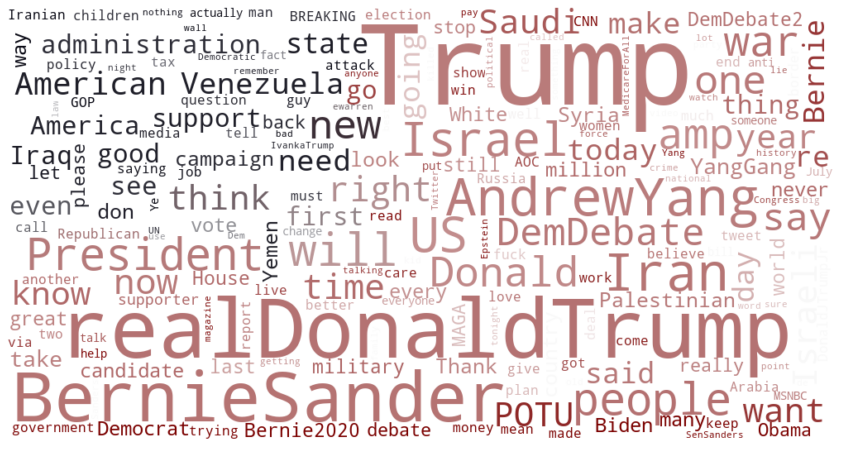

In [7]:
corpus = ""
for tweet in seed_tweets:
    corpus = corpus + " " + tweet

corpus_wordcloud = WordCloud(collocations = False,background_color="white",height=2000, width=4000, mode="RGB",mask=usa_mask)
image_colors = ImageColorGenerator(usa_mask)
freq = hashtag_wordcloud.process_text(corpus)
hashtag_wordcloud.generate_from_frequencies(freq)
# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(hashtag_wordcloud.recolor(color_func=image_colors),interpolation='bilinear')
plt.axis('off');

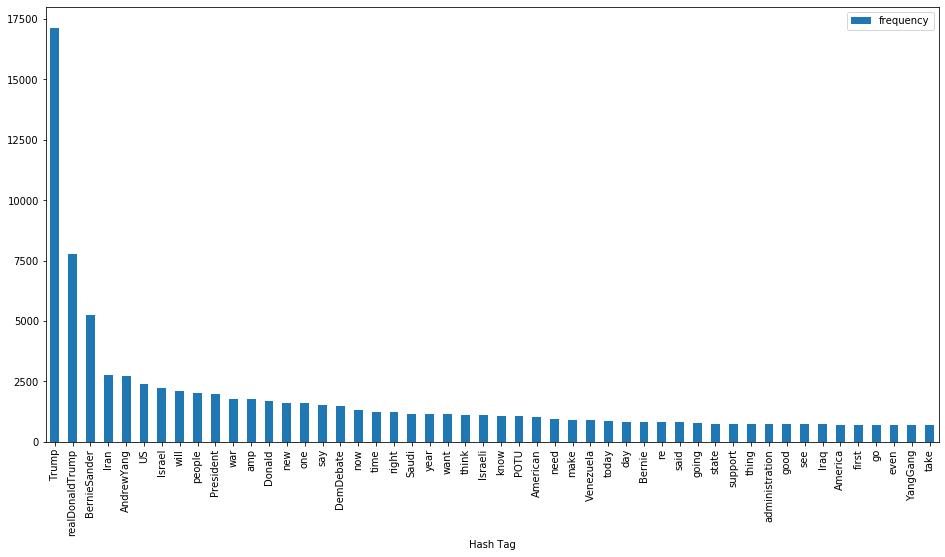

In [8]:
freq_list = sorted(freq.items(), key=lambda x: x[1], reverse=True)[:50]
df = pd.DataFrame(freq_list, columns=['Hash Tag', 'frequency'])
df.plot(kind='bar',x='Hash Tag',y='frequency', figsize = (16,8))

In [9]:
df = pd.DataFrame({'tweets':seed_tweets})
analyzer = SentimentIntensityAnalyzer()
tweets_list = []
for index, row in df.iterrows():
    score = analyzer.polarity_scores(row[0])
    temp = [row[0],score['pos'],score['neg'],score['neu'],score['compound']]
    tweets_list.append(temp)

Top 20 Positive Tweets

In [10]:
df_sentiments = pd.DataFrame.from_records(tweets_list, columns=(['Tweet','Positive','Negative','Neutral','Compound']))
df_sentiments = df_sentiments.sort_values('Compound',ascending=False)
pd.options.display.max_colwidth = 120
df_sentiments.head(20)

,Tweet,Positive,Negative,Neutral,Compound
4243,"@NelsonxShawn: love is love is love is love is love, and love will always trump hate.",0.665,0.098,0.237,0.9735
40860,"@djrothkopf: But if we stand for what is best about America and hope for the best for Israel, then we must welcome ...",0.469,0.000,0.531,0.9700
37099,@AndrewYang: Happy 4th of July America! Hope you are celebrating with family and friends - have a wonderful holiday...,0.614,0.000,0.386,0.9669
39048,@realDonaldTrump: Congratulations to the U.S. Women’s Soccer Team on winning the World Cup! Great and exciting play...,0.576,0.000,0.424,0.9656
27802,"@DonaldJTrumpJr: Jeb! I love everything about my father. I love that he’s a fighter, I love that he has guts, I lov...",0.555,0.000,0.445,0.9622
46882,Amy Klobuchar: yeah I’m a woman who can win and I have won and won bigly and I can win again for you ok #DemDebate,0.548,0.000,0.452,0.9607
9254,"@ssouriyeh: I love lebanon just as much as I love syria too. Truly, truly the most beautiful place on earth",0.586,0.000,0.414,0.9606
42086,"@POTUS: I won't stop; I'll be right there with you as a citizen, inspired by your voices of truth and justice, good...",0.555,0.000,0.445,0.9583
34240,“How Pelosi Turned Trump’s Greatest Super Power Against Him” “How Pelosi Turned Trump’s Greatest Super Power Agains…,0.555,0.000,0.445,0.9531
18786,"@women4yang: Wow, #YangOnTheView was excellent. Love that he mentioned we need to destigmatize mental health issues...",0.501,0.000,0.499,0.9523


Top 20 Negative Tweets

In [11]:
df_sentiments.tail(20)

,Tweet,Positive,Negative,Neutral,Compound
33560,@michaelcburgess @POTUS They can leave whenever they want? WTF is wrong with you. Is every member of the GOP brain d...,0.037,0.504,0.459,-0.9536
46373,@MelissaJPeltier Not really that amazing. Trump justifies their hate and excuses their fear and ignorance. They’d ki...,0.000,0.554,0.446,-0.9544
33628,"@FAIRmediawatch: Fighting that killed 22 Palestinians &amp; 4 Israelis was ""worst combat since the last full-blown ...",0.000,0.537,0.463,-0.9545
34061,"@shannonrwatts: Donald Trump has been accused of raping a 13-year-old, raping his ex-wife and attempting to rape a ...",0.000,0.524,0.476,-0.9552
611,@SheaSerrano: donald trump is such a massively horrible and shitty piece of shit that he was just publicly accused ...,0.000,0.494,0.506,-0.9559
33495,@Betelgeuse100: A herd (plague) of Israeli “soldiers” (nothing but illegal colonial terrorists in uniforms) continu...,0.000,0.512,0.488,-0.9568
12163,@MAGA_NightShift @RealJamesWoods Bombing abortion clinics. Killing doctors. Molesting children. Raping women. Are yo...,0.000,0.607,0.393,-0.9583
5989,"@MarkRuffalo: This war has killed 85,000 children. It’s an immoral and useless war. America should wash its hands o...",0.000,0.516,0.484,-0.9590
26172,@ThirdWayMattB @BernieSanders SHUT THE FUCK UP YOU LYING ASS BITCH,0.000,0.741,0.259,-0.9592
20147,Everyone except Trump this debate: FUCKING WW3 BITCHES ARM UKRAINE KILL OUR SONS DEATH TO PALESTINE honestly what th...,0.081,0.516,0.404,-0.9594
